In [ ]:
!pip install numpy
!pip install tensorflow
!pip install matplotlib
!pip install seaborn

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

✅ Test Accuracy: 0.973
✅ Model saved!


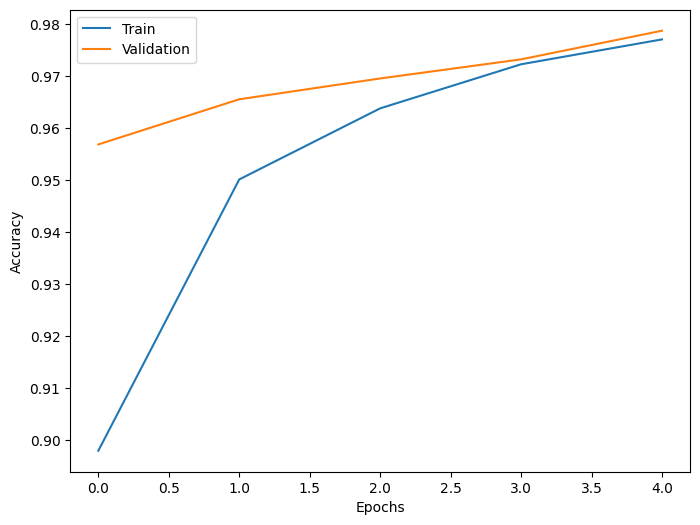

In [ ]:
# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build model (updated to avoid warning)
model = Sequential([
    tf.keras.Input(shape=(28, 28)),  # Preferred over Flatten(input_shape=...)
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1,
    verbose=0
)

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {test_acc:.3f}")
print("✅ Model saved!")

# Save model (create folder first)
os.makedirs("models", exist_ok=True)
model.save("models/mnist_model.keras")

# Plot accuracy
plt.figure(figsize=(8, 6))
sns.lineplot(y=history.history['accuracy'], x=range(5), label='Train')
sns.lineplot(y=history.history['val_accuracy'], x=range(5), label='Validation')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
!pip install flask


In [ ]:
# deployment
from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
import numpy as np

app = Flask(__name__)
model = load_model("models/mnist_model.keras")

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()['image']
    image = np.array(data).reshape(1, 28, 28).astype("float32")
    pred = model.predict(image)
    return jsonify({'prediction': int(np.argmax(pred))})

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
